# 🎮 GameCo Video Game Sales Analysis

In this analysis, I’m diving into global video game sales from 1980 to 2016 to help GameCo better understand market trends.  
The goal is to uncover insights about genre popularity across regions, how different publishers are performing, and which platforms have dominated over time.

I'll also be exploring patterns that aren't immediately obvious, looking for anything that can help guide smarter decisions moving forward.

Let’s dig into the data and see what stands out.

## Table of Contents

- [1. Import Libraries](#1-import-libraries)
- [2. Load Data](#2-load-data)
- [3. Data Cleaning](#3-data-cleaning)
- [4. Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
- [5. Feature Engineering](#5-feature-engineering)
- [6. Case Study Analysis](#9-case-study-analysis)
- [7. Conclusion](#10-conclusion)

---

## 1. Import Libraries

First, I’m importing all the libraries I’ll need for cleaning, analyzing, visualizing, and modeling the data. Keeping them all in one place at the top makes things easier to manage later on.

In [63]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [7]:
# Import all libraries at the top to keep things organized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: prettier charts
import plotly.express as px

# For machine learning (later steps)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Settings
plt.style.use("ggplot")
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

---

## 2. Load Data

Now I’m loading the video game sales dataset I cleaned earlier.  
This version includes sales by region, platform, genre, publisher, and release year. I want to get a quick look at the structure and make sure everything came in correctly.

In [13]:
# Load the cleaned dataset using the full correct path
df = pd.read_excel(r"D:\YVC\YVC Portfolio Implementation\Data Analytics Projects\Video Game Sales\02 Data\Cleaned\vgsales_final_cleaned_dataset.xlsx")

# Preview the structure
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,NA_Units,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,"2,006.00",Sports,Nintendo,41.49,0.00,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,"1,985.00",Platform,Nintendo,29.08,0.00,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,"2,008.00",Racing,Nintendo,15.85,0.00,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,"2,009.00",Sports,Nintendo,15.75,0.00,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,Nintendo,11.27,0.00,8.89,10.22,1.00,31.37


In [15]:
# Look at column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16600 entries, 0 to 16599
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16600 non-null  int64  
 1   Name          16583 non-null  object 
 2   Platform      16578 non-null  object 
 3   Year          16329 non-null  float64
 4   Genre         16584 non-null  object 
 5   Publisher     16524 non-null  object 
 6   NA_Sales      16599 non-null  float64
 7   NA_Units      16594 non-null  float64
 8   EU_Sales      16593 non-null  float64
 9   JP_Sales      16593 non-null  float64
 10  Other_Sales   16023 non-null  float64
 11  Global_Sales  16593 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


---

## 3. Data Cleaning

Time to clean things up. I’ll start by checking for any missing values, fixing column types, and renaming things if needed. Keeping the dataset clean will make the analysis smoother later on.

In [19]:
# Check for missing values in each column
df.isnull().sum()

Rank              0
Name             17
Platform         22
Year            271
Genre            16
Publisher        76
NA_Sales          1
NA_Units          6
EU_Sales          7
JP_Sales          7
Other_Sales     577
Global_Sales      7
dtype: int64

🔽🔽🔽🔽🔽

### 🔹Drop rows with missing identifiers

Before doing any analysis, I need to make sure the data has the basics like name, platform, genre, publisher, and year.  
If any of those are missing, the row won’t be useful, so I’m dropping them first.

In [22]:
# Drop rows missing key identifying info
df.dropna(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], inplace=True)

# Check new shape
df.shape

(16237, 12)

🔽🔽🔽🔽🔽

### 🔹Handle missing sales values

There are just a few missing values in the regional and global sales columns.  
Since these are numerical, I’ll fill them with 0 which makes sense because missing likely means no reported sales in that region.

In [27]:
# Fill missing numeric sales values with 0
sales_cols = ['NA_Sales', 'NA_Units', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[sales_cols] = df[sales_cols].fillna(0)

# Check again to confirm
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
NA_Units        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

🔽🔽🔽🔽🔽

### 🔹Convert the Year column to an integer

The Year column came in as a float, but it should just be a whole number.  
I’m changing it to an integer so it’s cleaner and easier to work with later.

In [31]:
# Convert Year from float to integer
df['Year'] = df['Year'].astype(int)

# Check the result
df.dtypes['Year']

dtype('int32')

🔽🔽🔽🔽🔽

### 🔹Rename columns to Python-friendly format

Renaming the columns to snake_case and lowercase. This helps avoid issues when writing code later, and keeps everything clean and consistent.

In [36]:
# Rename columns: lowercase + snake_case
df.rename(columns={
    'Rank': 'rank',
    'Name': 'name',
    'Platform': 'platform',
    'Year': 'year',
    'Genre': 'genre',
    'Publisher': 'publisher',
    'NA_Sales': 'na_sales',
    'NA_Units': 'na_units',
    'EU_Sales': 'eu_sales',
    'JP_Sales': 'jp_sales',
    'Other_Sales': 'other_sales',
    'Global_Sales': 'global_sales'
}, inplace=True)

# Confirm new column names
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'na_units', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

---

## 4. Exploratory Data Analysis (EDA)

I’ve already explored the usual breakdowns in Tableau, like genre sales by region and overall platform trends.  
This time I want to dig deeper using Python and apply some machine learning.

The goal here is to see if there are patterns in how publishers behave. 
Can I group them based on things like regional sales performance or genre spread?  

If GameCo can identify different “types” of publishers, that could help shape future partnership strategies.

### 🔹Prepare publisher data for clustering

To find patterns in publisher behavior, I need to group the data by publisher and calculate things like total sales per region.  
This will give me a matrix where each publisher is a row, and their sales patterns across different regions become the features for clustering.

In [47]:
# Group data by publisher and sum regional/global sales
publisher_sales = df.groupby('publisher')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum()

# Preview the data
publisher_sales.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12


🔽🔽🔽🔽🔽

### 🔹Scale the sales data

Since the sales numbers vary a lot by region, I’m using StandardScaler to normalize everything.  
This makes sure one region doesn’t outweigh the others just because the values are bigger.

In [54]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(publisher_sales)

# Convert back to a DataFrame for easier viewing (optional)
scaled_df = pd.DataFrame(scaled_data, index=publisher_sales.index, columns=publisher_sales.columns)
scaled_df.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
publisher,,,,,
10TACLE Studios,-0.15,-0.15,-0.11,-0.15,-0.15
1C Company,-0.15,-0.15,-0.11,-0.15,-0.15
20th Century Fox Video Games,-0.11,-0.14,-0.11,-0.15,-0.13
2D Boy,-0.15,-0.15,-0.11,-0.15,-0.15
3DO,-0.02,-0.04,-0.11,-0.08,-0.05


🔽🔽🔽🔽🔽

### 🔹Using the elbow method to choose the number of clusters

Before running KMeans, I need to figure out how many clusters make sense.  
The elbow method shows how the model’s error drops as I increase the number of clusters.  
The goal is to find the point where adding more clusters doesn’t improve things much that’s the “elbow.”

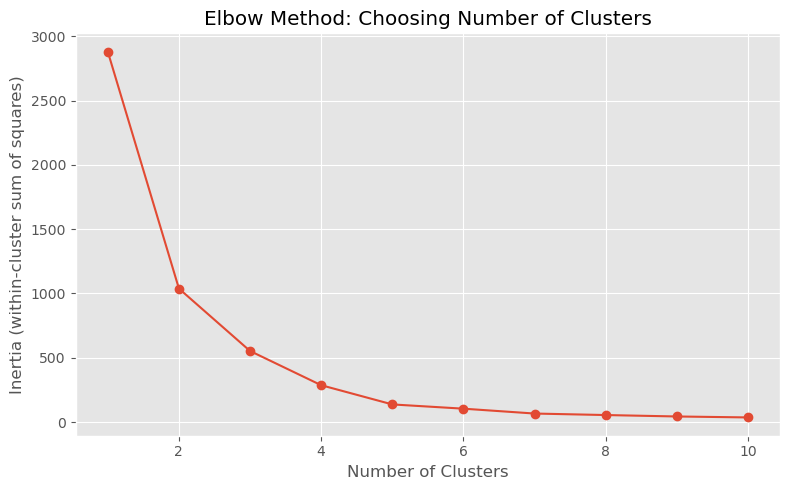

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try cluster counts from 1 to 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Choosing Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.grid(True)
plt.tight_layout()
plt.show()

🔽🔽🔽🔽🔽

### 🔹Train KMeans models (3 and 4 clusters)

I’m running KMeans with both 3 and 4 clusters to see how the publisher groupings change.  
This will help me compare the difference between a simpler view and a more detailed one.

In [70]:
# Run KMeans with 3 and 4 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)

# Fit the models
clusters_3 = kmeans_3.fit_predict(scaled_df)
clusters_4 = kmeans_4.fit_predict(scaled_df)

# Add cluster labels to the original (unscaled) DataFrame
publisher_clustered = publisher_sales.copy()
publisher_clustered['cluster_3'] = clusters_3
publisher_clustered['cluster_4'] = clusters_4

# Preview results
publisher_clustered.head()

,na_sales,eu_sales,jp_sales,other_sales,global_sales,cluster_3,cluster_4
publisher,,,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11,0,0
1C Company,0.01,0.07,0.00,0.02,0.10,0,0
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94,0,0
2D Boy,0.00,0.03,0.00,0.01,0.04,0,0
3DO,6.48,3.04,0.00,0.63,10.12,0,0


🔽🔽🔽🔽🔽

### 🔹Visualize the clusters

To get a better sense of how publishers are grouped, I’m using PCA to reduce the sales features to 2D.  
Then I’ll plot both the 3-cluster and 4-cluster versions side by side to compare.

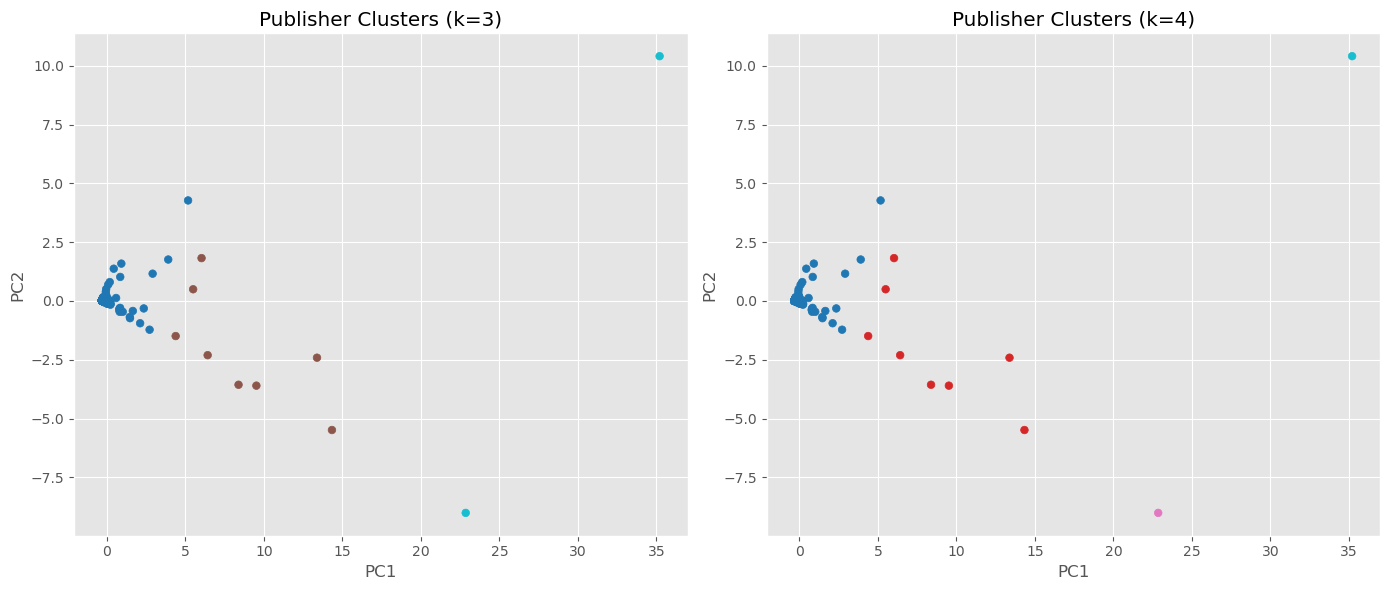

In [82]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create DataFrame for plotting
plot_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'], index=publisher_clustered.index)
plot_df['cluster_3'] = publisher_clustered['cluster_3']
plot_df['cluster_4'] = publisher_clustered['cluster_4']

# Plot both side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# 3 clusters
axs[0].scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['cluster_3'], cmap='tab10', s=30)
axs[0].set_title('Publisher Clusters (k=3)')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# 4 clusters
axs[1].scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['cluster_4'], cmap='tab10', s=30)
axs[1].set_title('Publisher Clusters (k=4)')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')

plt.tight_layout()
plt.show()

### 🧩 Interpreting the clustering results

Both models worked: one with 3 clusters and one with 4 so I compared them side by side.

**With 3 clusters**, the split is pretty clean:
1. Big publishers with strong global sales
2. Region-focused publishers (mostly NA and EU)
3. Smaller publishers with low overall sales

This version is simple and easy to explain. It gives a clear picture of who’s dominating, who’s focused on specific markets, and who has limited reach.

**With 4 clusters**, it adds more detail. One of the groups from before breaks into two:
- Some publishers focus mostly on NA and EU
- Others have more sales in Japan or are spread across regions with smaller numbers

That extra layer helps GameCo see different types of publisher behavior. One group might be stronger in Western markets, while another leans more toward Japan or has balanced but modest sales across regions.

Both versions are useful. The 3-cluster model is easier to explain. The 4-cluster version adds more detail if we want to dig deeper into strategy.

🔽🔽🔽🔽🔽

### 🔹Identify top publishers in each cluster (k=4)

To make the clusters more meaningful, I want to see which publishers ended up in each group.  
This helps connect the patterns I found to real companies, like Nintendo, EA, or Ubisoft, and makes the insights easier to act on.

In [91]:
# Count how many publishers are in each cluster
publisher_counts = publisher_clustered['cluster_4'].value_counts().sort_index()
print("Publishers per cluster:")
print(publisher_counts)

# Show top publishers (by global sales) for each cluster
for cluster in sorted(publisher_clustered['cluster_4'].unique()):
    print(f"\nTop publishers in Cluster {cluster}:")
    top = publisher_clustered[publisher_clustered['cluster_4'] == cluster] \
        .sort_values('global_sales', ascending=False).head(5)
    display(top[['global_sales']])

Publishers per cluster:
cluster_4
0    566
1      8
2      1
3      1
Name: count, dtype: int64

Top publishers in Cluster 0:


,global_sales
publisher,
Namco Bandai Games,253.46
Capcom,199.95
Atari,146.72
Square Enix,144.73
Warner Bros. Interactive Entertainment,142.34



Top publishers in Cluster 1:


,global_sales
publisher,
Activision,721.36
Sony Computer Entertainment,607.20
Ubisoft,473.49
Take-Two Interactive,399.30
THQ,340.44



Top publishers in Cluster 2:


,global_sales
publisher,
Electronic Arts,"1,093.39"



Top publishers in Cluster 3:


,global_sales
publisher,
Nintendo,"1,784.43"


🔽🔽🔽🔽🔽

### 🔹Compare average regional sales by cluster

Now that I’ve seen who’s in each cluster, I want to understand how they behave.  
Looking at the average sales per region for each cluster will show if some groups are more NA-focused, more global, or just smaller overall.

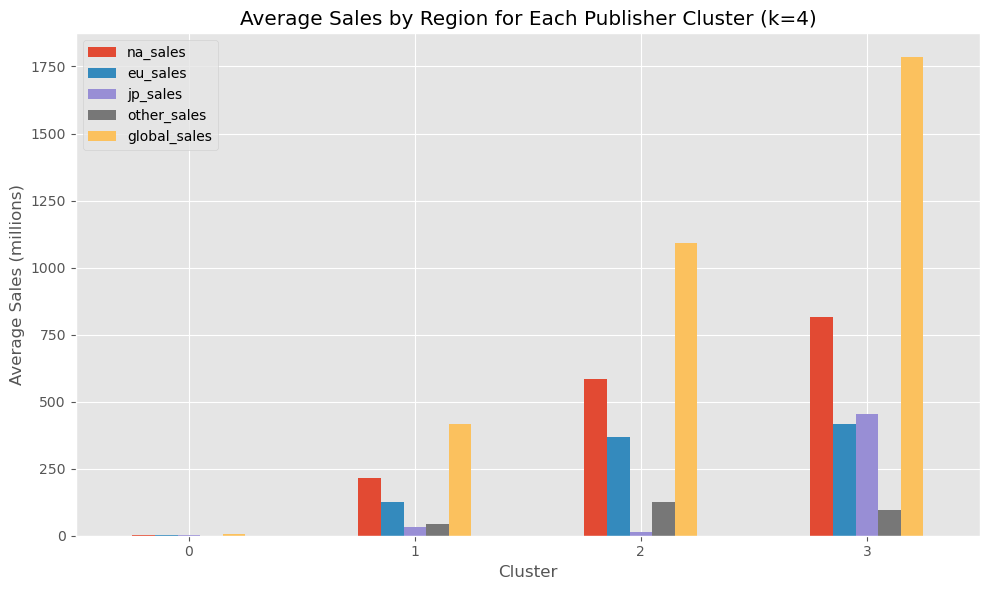

,na_sales,eu_sales,jp_sales,other_sales,global_sales
cluster_4,,,,,
0,2.12,1.10,1.00,0.35,4.58
1,215.75,124.44,31.12,45.43,417.08
2,584.22,367.38,13.98,127.40,"1,093.39"
3,815.75,418.30,454.99,94.92,"1,784.43"


In [96]:
# Calculate mean sales by cluster
cluster_avg_sales = publisher_clustered.groupby('cluster_4')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].mean()

# Round for readability
cluster_avg_sales = cluster_avg_sales.round(2)

# Display the results
import matplotlib.pyplot as plt
cluster_avg_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Average Sales by Region for Each Publisher Cluster (k=4)")
plt.ylabel("Average Sales (millions)")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Show table too
cluster_avg_sales

### 📊 Comparing average sales by cluster

Looking at the average sales across regions really helps define what each cluster is doing.

**Cluster 0** has the lowest numbers across the board. These are small publishers with limited reach, probably focused on a few titles or markets.

**Cluster 1** is mid-tier. They do well in North America and Europe but have lower numbers in Japan and globally overall. These might be solid regional players that haven’t scaled up globally yet.

**Cluster 2** stands out as a strong performer. High sales in NA and EU, some presence in JP and Other regions, and strong global totals. This group is balanced and well established.

**Cluster 3** is clearly the top tier. These publishers are doing big numbers in all regions, especially Japan, which most others struggle with. Global sales here are massive. This is where Nintendo and a few other major names show up.

This breakdown helps GameCo understand where different types of publishers sit. Whether they want to work with global leaders or find under tapped regional players, the clusters make those patterns easier to spot.

---

## 5. Feature Engineering

The data is clean and I’ve already explored some key patterns, so it’s time to create new features to support the next steps.  
These will help show things like how efficient publishers are, whether they’re region-focused, or how they behave over time.  
They’ll also be useful if I move into modeling or more advanced analysis later on.

### 🔹Sales_per_title feature

Some publishers release tons of games, but don’t sell much per title.  
Others might release fewer games but generate a lot of sales per game.  
This feature helps show which publishers are more efficient in terms of sales per release.

In [108]:
# Calculate number of titles per publisher
publisher_counts = df['publisher'].value_counts()

# Map title counts to the publisher_clustered DataFrame
publisher_clustered['title_count'] = publisher_clustered.index.map(publisher_counts)

# Create the new feature
publisher_clustered['sales_per_title'] = (publisher_clustered['global_sales'] / publisher_clustered['title_count']).round(2)

# Preview result
publisher_clustered[['global_sales', 'title_count', 'sales_per_title']].sort_values(by='sales_per_title', ascending=False).head()

,global_sales,title_count,sales_per_title
publisher,,,
Palcom,4.17,1,4.17
Red Orb,5.24,2,2.62
Nintendo,"1,784.43",696,2.56
Arena Entertainment,4.72,2,2.36
UEP Systems,2.25,1,2.25


### 🎯 Interpreting sales_per_title results

This shows how much global sales each publisher generates per game released.

Publishers like Palcom and Red Orb are at the top of this list, but it’s because they only released one or two games.  
Nintendo, on the other hand, released over 600 titles and still lands near the top, which says a lot about their consistency and reach.

This feature helps separate publishers who release a ton of games from those who actually perform well per title.  
It’s also a good starting point if I want to model publisher efficiency or explore release strategies later on.

🔽🔽🔽🔽🔽

### 🔹Create na_focus_ratio feature

This feature shows how much of a publisher’s global sales come from North America.  
It helps spot publishers that are heavily focused on NA versus those with more balanced or international reach.

In [115]:
# Avoid divide-by-zero by replacing 0 global_sales with NaN
publisher_clustered['na_focus_ratio'] = (
    publisher_clustered['na_sales'] / publisher_clustered['global_sales'].replace(0, np.nan)
).round(2)

# Preview top and bottom publishers by NA focus
publisher_clustered[['na_sales', 'global_sales', 'na_focus_ratio']] \
    .sort_values(by='na_focus_ratio', ascending=False).head()

,na_sales,global_sales,na_focus_ratio
publisher,,,
HAL Laboratory,0.06,0.06,1.00
Westwood Studios,1.55,1.55,1.00
Her Interactive,0.03,0.03,1.00
Cloud Imperium Games Corporation,0.08,0.08,1.00
Dusenberry Martin Racing,0.05,0.05,1.00


### 📍 Interpreting na_focus_ratio results

This feature shows which publishers are entirely focused on North America.

Publishers like HAL Laboratory and Westwood Studios have all of their sales coming from NA, with no significant presence in other regions.  
This helps GameCo spot regional concentration and possible gaps in market coverage.

It also gives context to earlier cluster results. A publisher might have decent global sales but still be mostly NA based in terms of audience.  
This feature could be useful for identifying expansion opportunities or evaluating risk tied to regional dependency.

---

## 6. Case Study Analysis

After cleaning the data, exploring trends, and applying clustering, I wanted to help GameCo understand what kind of publishers exist in the market, how they behave, and where the best opportunities might be.

Clustering publishers by regional and global sales helped surface different behavior patterns, from global giants like Nintendo to regionally focused publishers with strong sales in just one market.  
The clusters gave GameCo a way to spot publisher types based on performance, not just brand recognition.

I also created two new features to dig into efficiency and focus:

- `sales_per_title` showed how much global revenue publishers earn per game, helping separate quantity from quality.
- `na_focus_ratio` revealed which publishers are entirely dependent on North America, which could signal market limitations or expansion potential.

Together, these patterns help answer key questions:  
Who should GameCo partner with? Who’s underperforming globally but strong in one market? And which publishers punch above their weight with just a few solid releases?

This analysis gives GameCo a fresh lens to approach its publisher strategy, from partnerships to regional marketing to identifying gaps in the market.

---

## 7. Conclusion

This analysis gave me the chance to go beyond surface-level trends and really dig into publisher behavior using Python and machine learning.

I used KMeans clustering to group publishers based on their sales across different regions, which helped reveal patterns that weren’t visible just by looking at totals or charts.  
From there, I built new features to explore how efficient each publisher is and how focused they are on certain markets, especially North America.

These insights can help GameCo make smarter decisions about who to work with, where to expand, and how to position its strategy moving forward.

If I were to keep going, I’d want to bring in newer data past 2016 and maybe explore time trends or predictive models to forecast shifts in the market.  
But even with the existing data, this case study showed how much value can come from clustering, clean analysis, and asking the right questions.